Data taken from free to use source: http://www.opendata500.com/us/download/us_companies.csv

In [44]:
import urllib.request
import shutil

url = 'http://www.opendata500.com/us/download/us_companies.csv'
file_name = 'data.csv'
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers={'User-Agent':user_agent,} 

request=urllib.request.Request(url, None, headers)
with urllib.request.urlopen(request) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)


In [45]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('data.csv'))

In [67]:
df

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,...,"Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,...,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,...,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802
5,accenture,Accenture,http://www.accenture.com/us-en/pages/index.aspx,1989.0,Chicago,IL,us,60601.0,"10,001+",Public,...,Business to Business,NaN,Accenture delivers its services and solutions ...,"Accenture provides management consulting, tech...",NaN,Health/Healthcare,NaN,[],NaN,2014-09-18 15:44:37.967430
6,accuweather,AccuWeather,http://www.accuweather.com,1962.0,State College,PA,us,16803.0,201-500,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,AccuWeather provides local forecasts for every...,AccuWeather provides local forecasts for every...,NaN,Economics,NaN,[],NaN,2014-11-12 14:16:13.464045
7,acxiom,Acxiom,http://acxiom.com,1969.0,Little Rock,AR,us,72201.0,"5,001-10,000",Public,...,Business to Business,NaN,"Acxiom is an enterprise data, analytics and so...","Acxiom is an enterprise data, analytics and so...",101+,NaN,NaN,[],NaN,2014-09-18 16:53:16.538684
8,adaptive,Adaptive,http://www.adaptive.com,2001.0,Irvine,CA,us,92618.0,11-50,Private,...,Business to Business,NaN,Adaptive offers standards-based solutions that...,Adaptive helps organizations leverage what the...,NaN,NaN,NaN,[],NaN,2014-09-18 16:53:46.057500
9,adobe-digital-government,Adobe Digital Government,http://www.adobe.com/solutions/government.html,2009.0,San Jose,CA,us,95510.0,"10,001+",Public,...,Business to Government,NaN,Adobe Digital Government is part of Adobe Syst...,Adobe delivers solutions that help government ...,101+,NaN,NaN,[],NaN,2014-09-18 16:54:15.544335


In [368]:
# Variables

layers = ['company_type', 'state', 'city']
value = 'amount'
minimum_value = 3 # Skip values less than minimum

In [369]:
df['amount'] = [1 for x in range(len(df))]

In [370]:
city = df['city'].value_counts()
city = city[city > minimum_value]
city.head()

New York         83
San Francisco    45
Boston           21
Chicago          17
Washington       17
Name: city, dtype: int64

In [371]:
df_big = df.loc[df['city'].isin(city.index)]

In [372]:
# df_big.groupby(['company_type', 'state', 'city'])['amount'].sum().to_frame().head(20)

In [373]:
def percentage_growth(l):
    s = 0
    res = [0]
    for i in range(len(l)-1):
        s += l[i]
        res.append(s / sum(l))
    return res

In [374]:
import matplotlib.pyplot as plt

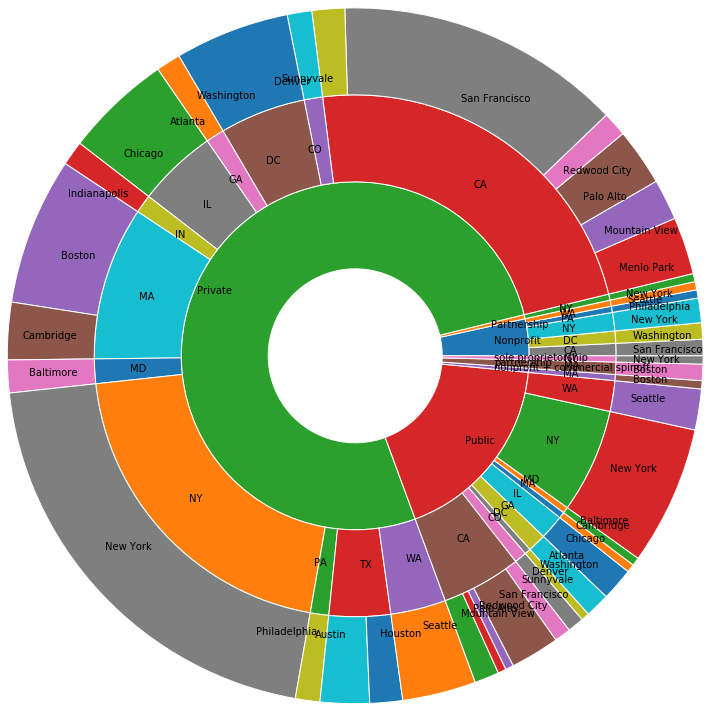

In [377]:
plt.axis("equal")
lnum = 0

for layer in layers:
    radius = lnum + 2
    width = 1
    frame = df_big.groupby(layers[:lnum+1])['amount'].sum()
#     frame = frame[frame > minimum_value]
    labels = [x[-1] if isinstance(x, tuple) else x for x in frame.index.get_values()]
    plt.pie(frame, labels=labels, radius=radius, wedgeprops=dict(width=width, edgecolor='w'), labeldistance=0.8)
    lnum += 1